In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:

df = pd.read_csv('credit_card_data.csv', skiprows = 1)

df.set_index('ID', inplace=True)

df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [29]:
df.columns = df.columns.str.lower()
df.rename({'default payment next month': 'default'}, axis= 1, inplace= True)

In [1]:
# no nulls, 30k data points
# df.info()

In [356]:
# df.describe().iloc[:,:]

<h3> Data Cleaning </h3>

In [37]:
# drop the education = 0 and marriage = 0 they are likely unknowns
# we're losing 14 + 54 data points

df.drop(df[df['education']==0].index, inplace=True)
df.education.value_counts()

2    14024
1    10581
3     4873
5      280
4      123
6       51
Name: education, dtype: int64

In [35]:
df.drop(df[df['marriage']==0].index, inplace=True)
df.marriage.value_counts()

2    15954
1    13655
3      323
Name: marriage, dtype: int64

In [31]:
# df[df['pay_0']==-2].iloc[:,5:24]

In [11]:
# df[df['default']==1].iloc[:,5:23]

In [32]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [33]:
for i in range(1,7):
    df[f'pay%_{i}'] = df[f'pay_amt{i}'] / df[f'bill_amt{i}']

In [40]:
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,pay_amt4,pay_amt5,pay_amt6,default,pay%_1,pay%_2,pay%_3,pay%_4,pay%_5,pay%_6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,0.000000,0.222115,0.000000,NaN,NaN,NaN
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,0,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564
4,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,0,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844
5,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,0,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492


<h2> Q1: are older customers better customers? </h2>

In [202]:
# create bins for age
df['age_bucket'] = pd.cut(df.age, bins=[0, 25, 30, 35, 40, 50, 80])

# group the data by sex and age bucket to calculate % of default contained in that bin
age_sex = df.groupby(['sex','age_bucket']).agg({'default':['count','mean']})


# reset the index again for slicing and plotting data
age_sex.reset_index(inplace=True)
age_sex.columns = age_sex.columns.get_level_values(0)

age_sex.columns = ['sex','age_bucket','counts','default%']
age_sex

,sex,age_bucket,counts,default%
0,1,"(0, 25]",1165,0.292704
1,1,"(25, 30]",2671,0.213403
2,1,"(30, 35]",2307,0.218032
3,1,"(35, 40]",2046,0.249267
4,1,"(40, 50]",2582,0.250968
5,1,"(50, 80]",1095,0.273059
6,2,"(0, 25]",2703,0.255642
7,2,"(25, 30]",4459,0.194438
8,2,"(30, 35]",3477,0.179177
9,2,"(35, 40]",2854,0.193763


In [268]:
# create a function to plot bar charts for default% for various slices, segments of data
def default_compare_plt(df, x, y, colour,i):
    df.plot(
    x = x, y= y, kind='bar', figsize=(8,6),
    title=f'Default% for {i} Customers', fontsize=12, color=colour, legend=False, ylim=(0,0.3)
);

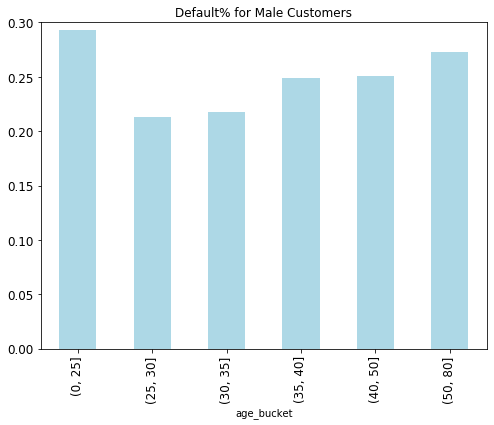

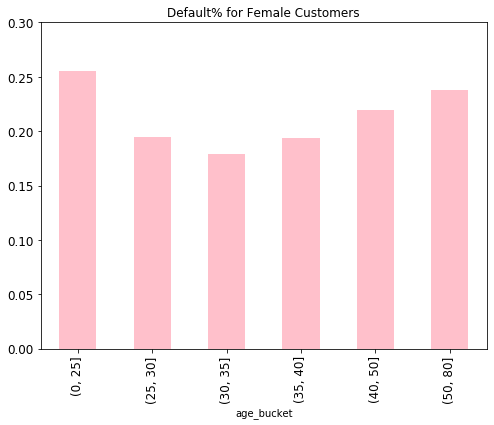

In [271]:
default_compare_plt(age_sex[age_sex['sex'] == 1],'age_bucket','default%','lightblue','Male')
default_compare_plt(age_sex[age_sex['sex'] == 2],'age_bucket','default%','pink','Female')

In [272]:
# male = age_sex[age_sex['sex'] == 1]
# female = age_sex[age_sex['sex'] == 2]

# male.set_index('age_bucket', inplace=True)
# female.set_index('age_bucket', inplace=True)

<h2> Q2: are customers with higher education better customers? </h2>

In [266]:
edu_sex = df.groupby(['sex','education']).agg({'default':['count','mean']})

# reset the index again for slicing and plotting data
edu_sex.reset_index(inplace=True)
edu_sex.columns = age_sex.columns.get_level_values(0)

edu_sex.columns = ['sex','education','counts','default%']
edu_sex

,sex,education,counts,default%
0,1,1,4353,0.208132
1,1,2,5373,0.262051
2,1,3,1978,0.274520
3,1,4,42,0.095238
4,1,5,95,0.063158
5,1,6,25,0.160000
6,2,1,6228,0.181439
7,2,2,8651,0.222055
8,2,3,2895,0.238342
9,2,4,81,0.037037


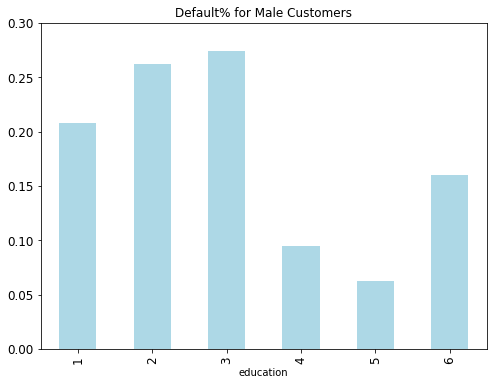

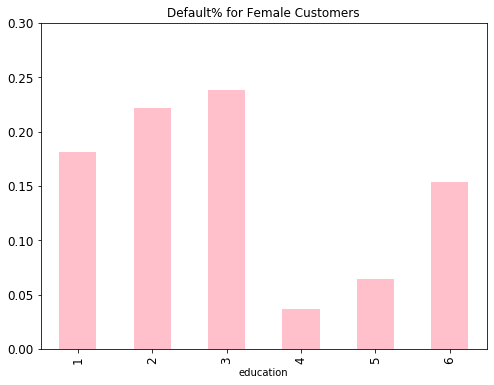

In [274]:
default_compare_plt(edu_sex[edu_sex['sex'] == 1],'education','default%','lightblue','Male')
default_compare_plt(edu_sex[edu_sex['sex'] == 2],'education','default%','pink','Female')


In [ ]:
# group 4,5,6 into one bin?

<h2> Q3: are married customers better customers? </h2>

In [289]:
marr = df.groupby(['marriage']).agg({'default':['count','mean'], 'age':'mean','education':'mean'})
marr.reset_index(inplace=True)

marr.columns = ['marriage','counts','default%','avg_age','avg_education']
marr

,marriage,counts,default%,avg_age,avg_education
0,1,13655,0.234786,40.016917,1.985720
1,2,15954,0.209415,31.448163,1.730538
2,3,323,0.260062,42.798762,2.235294


<h2> Q4: are recent arrears more relevant than past arrears? </h2>

In [337]:
# change 3 and above to one bin?
arrears = df.groupby(['pay_0']).agg({'default':['count','mean']})

arrears.reset_index(inplace=True)
arrears.columns = ['arrear_status','count','default%']

In [338]:
for i in range(2,7):
    arr_temp = df.groupby([f'pay_{i}']).agg({'default':['count','mean']})
    arr_temp.reset_index(inplace=True)
    arr_temp.columns = ['arrear_status','count','default%']
    arrears = arrears.join(arr_temp['default%'],lsuffix=f'_{i-1}',rsuffix=f'_{i}')

In [339]:
arrears

,arrear_status,count,default%_1,default%_2,default%_3,default%_4,default%_5,default%_6
0,-2,2749,0.132412,0.183024,0.185749,0.192982,0.197130,0.200943
1,-1,5667,0.168343,0.160226,0.156472,0.159520,0.162471,0.170309
2,0,14713,0.128186,0.159259,0.174681,0.183351,0.188723,0.188576
3,1,3678,0.340131,0.178571,0.250000,0.500000,0.542541,0.507246
4,2,2663,0.692077,0.556775,0.516146,0.524611,0.638418,0.644809
5,3,322,0.757764,0.616564,0.579832,0.611111,0.607143,0.632653
6,4,76,0.684211,0.510204,0.578947,0.666667,0.588235,0.538462
7,5,25,0.520000,0.600000,0.571429,0.514286,0.750000,0.736842
8,6,11,0.545455,0.750000,0.608696,0.400000,0.827586,0.826087
9,7,9,0.777778,0.600000,0.814815,0.827586,1.000000,1.000000


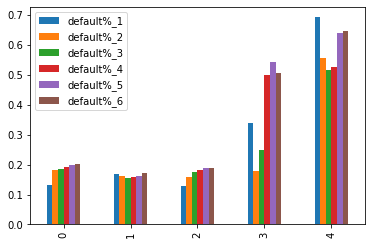

In [351]:
arrears.iloc[0:5,2:].plot(kind='bar');

In [352]:
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,pay_amt5,pay_amt6,default,pay%_1,pay%_2,pay%_3,pay%_4,pay%_5,pay%_6,age_bucket
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,1,0.000000,0.222115,0.000000,NaN,NaN,NaN,"(0, 25]"
2,120000,2,2,2,26,-1,2,0,0,0,...,0,2000,1,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309,"(25, 30]"
3,90000,2,2,2,34,0,0,0,0,0,...,1000,5000,0,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564,"(30, 35]"
4,50000,2,2,1,37,0,0,0,0,0,...,1069,1000,0,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844,"(35, 40]"
5,50000,1,2,1,57,-1,0,-1,0,0,...,689,679,0,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492,"(50, 80]"


<h3> Q5: Are people making smaller payments more likley to default?</h3>

In [355]:
# create bins for age
df['pay%_1_bin'] = pd.cut(df['pay%_1'], bins=[0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0])

# group the data by sex and age bucket to calculate % of default contained in that bin
pay_bin = df.groupby(['pay%_1_bin']).agg({'default':['count','mean']})


# reset the index again for slicing and plotting data
pay_bin.reset_index(inplace=True)
pay_bin.columns = ['pay%1_bin','counts','default%']
pay_bin

,pay%1_bin,counts,default%
0,"(0.0, 0.05]",8218,0.194573
1,"(0.05, 0.1]",5055,0.218595
2,"(0.1, 0.2]",2886,0.227997
3,"(0.2, 0.3]",1114,0.204668
4,"(0.3, 0.4]",678,0.188791
5,"(0.4, 0.5]",504,0.146825
6,"(0.5, 0.75]",882,0.130385
7,"(0.75, 1.0]",1336,0.187126


In [ ]:
sns.set_style("whitegrid")
sns.boxplot(df['age_bucket'], popu.popularity, palette="Purples").set_title("Song Popularity versus Artist Popularity")

In [23]:
df.pay_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pay_0, dtype: int64

In [38]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [42]:
df[df['default']==0].pay_0.value_counts(normalize=True)

 0    0.549949
-1    0.202534
 1    0.104263
-2    0.102465
 2    0.035225
 3    0.003338
 4    0.001027
 5    0.000556
 8    0.000342
 6    0.000214
 7    0.000086
Name: pay_0, dtype: float64

In [41]:
df[df['default']==1].pay_0.value_counts(normalize=True)

 0    0.284509
 2    0.277878
 1    0.188668
-1    0.143761
-2    0.055003
 3    0.036769
 4    0.007836
 5    0.001959
 8    0.001658
 7    0.001055
 6    0.000904
Name: pay_0, dtype: float64

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

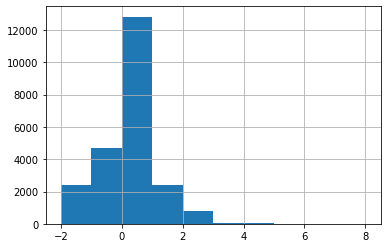

In [20]:
df[df['default']==0]['pay_0'].hist();